<a id="header"></a>
# High Skill Speed builds

In [271]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

GLOBAL_GCD = 2.05

[Return home](../)

## Table of contents
- <a href="#buff-priority">On buff priority</a>
- <a href="#meikyo-shisui">On Meikyo Shisui</a>
- <a href="#kenki-spending">On Kenki spending</a>
- <a href="#hissatsu-mobility">On Hissatsu: Gyoten / Yaten</a>
- <a href="#third-eye">On Third Eye</a>
- <a href="#hagakure">On Hagakure</a>
- <a href="#higanbana">On Higanbana</a>

Before Stormblood, TP was one of the limiting factors in the efficacy of high skill speed builds for Disciple of War jobs, Bard being one of the exceptions. The sheer effectiveness of the Critical Hit Rate and Determination substats by comparison made Skill Speed an unattractive option.

With Stormblood, TP costs were reduced across the table such that timely Invigorate use was no longer needed. Furthermore, Skill Speed was changed to affect the potency of auto attacks. 

Samurai is a bit unique compared to other jobs in that it acquires resource through the execution of weaponskills. While Warrior is similar in with its beast gauge, the difference is that the majority of Warrior's gauge spenders are weaponskills on the GCD while Samurai's are abilities off the GCD. Hence, more weaponskills translates directly to more Kenki and more Hissatsu: Shinten.

We'll need to be aware of how the decreased GCD affects cooldown placement in the rotation and make adjustments accordingly. While I do not do any work in the impact of secondary stats on damage, I believe that if we can demonstrate significant potency per second gains with high Skill Speed, we can show the efficacy of taking Skill Speed over the traditionally favored secondary stats.

<a href="#header">back to the top...</a>

### Baseline 3 minute encounter with 2.4s GCD

In [272]:
sam = Samurai(base_gcd=2.40, kenki_mastery=2, kenki_gauge=0)

actions = [('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Guren'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Kaiten'),
           ('Higanbana'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Kaiten'), 
           ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Shinten'), ('Kasha', 'Hagakure'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'),
           ('Higanbana'), ('Kasha'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Guren'), ('Gekko', 'Hagakure'), # 22s delay on Hagakure
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze', 'Hissatsu: Shinten')
          ]
df_2p4, _, _ = sam.parse_rotation(actions)

display(df_2p4)

average potency per GCD = 566.0622023809522
average potency per second = 261.71964443


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,"(Hagakure,)",400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,40,980.000
4,8.88,Jinpu,,280.000,False,True,False,0,45,1260.000
5,11.04,Gekko,"(Meikyo Shisui,)",460.000,True,True,False,0,50,1720.000
6,13.20,Yukikaze,"(Hissatsu: Guren,)",1412.200,True,True,False,0,60,3132.200
7,15.36,Kasha,"(Hissatsu: Kaiten,)",510.600,True,True,True,0,20,3642.800
8,17.52,Midare Setsugekka,,1378.620,True,True,True,0,10,5021.420
9,19.68,Gekko,,510.600,True,True,True,0,10,5532.020


### With 2.30s GCD

In [273]:
sam = Samurai(base_gcd=2.30, kenki_mastery=2, kenki_gauge=0)

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), 
           ('Higanbana'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Meikyo Shisui'),
           ('Kasha'), ('Gekko', 'Hissatsu: Kaiten'), 
           ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'), 
           ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'), # clip Higanbana here?
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), 
           ('Midare Setsugekka'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), 
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Meikyo Shisui'),
           ('Gekko', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Kaiten'), 
           ('Midare Setsugekka'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), 
           ('Midare Setsugekka'),
           ('Hakaze', 'Hissatsu: Guren'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Kaiten'), 
           ('Higanbana'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), 
           ('Midare Setsugekka')]
df0, _, _ = sam.parse_rotation(actions)

display(df0)

average potency per GCD = 570.8969460227274
average potency per second = 275.447838423


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.00000,False,False,False,0,0,150.00000
1,2.30,Shifu,,280.00000,False,False,False,0,5,430.00000
2,4.37,Kasha,,400.00000,False,True,False,0,10,830.00000
3,6.44,Hakaze,,150.00000,False,True,False,0,20,980.00000
4,8.51,Jinpu,,280.00000,False,True,False,0,25,1260.00000
5,10.58,Gekko,"(Hissatsu: Shinten,)",805.00000,True,True,False,0,30,2065.00000
6,12.65,Hakaze,,172.50000,True,True,False,0,15,2237.50000
7,14.72,Yukikaze,"(Hagakure,)",391.00000,True,True,False,0,20,2628.50000
8,16.79,Hakaze,"(Hissatsu: Guren,)",1212.67500,True,True,True,0,90,3841.17500
9,18.86,Shifu,,357.42000,True,True,True,0,45,4198.59500


### With 2.25s GCD

In [274]:
sam = Samurai(base_gcd=2.25, kenki_mastery=2, kenki_gauge=0)

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Higanbana'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Meikyo Shisui'),
           ('Kasha'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'), # clip Higanbana here?
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Meikyo Shisui'),
           ('Gekko', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Guren'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Kaiten'), ('Higanbana'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Jinpu')]
df1, _, _ = sam.parse_rotation(actions)

display(df1)

average potency per GCD = 564.9129305555556
average potency per second = 278.625366489


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.000,Hakaze,,150.000000,False,False,False,0,0,150.000000
1,2.250,Shifu,,280.000000,False,False,False,0,5,430.000000
2,4.275,Kasha,,400.000000,False,True,False,0,10,830.000000
3,6.300,Hakaze,,150.000000,False,True,False,0,20,980.000000
4,8.325,Jinpu,,280.000000,False,True,False,0,25,1260.000000
5,10.350,Gekko,"(Hissatsu: Shinten,)",805.000000,True,True,False,0,30,2065.000000
6,12.375,Hakaze,,172.500000,True,True,False,0,15,2237.500000
7,14.400,Yukikaze,"(Hagakure,)",391.000000,True,True,False,0,20,2628.500000
8,16.425,Hakaze,"(Hissatsu: Guren,)",1212.675000,True,True,True,0,90,3841.175000
9,18.450,Shifu,,357.420000,True,True,True,0,45,4198.595000


### With 2.20s GCD

In [275]:
sam = Samurai(base_gcd=2.20, kenki_mastery=2, kenki_gauge=0)

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Higanbana'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Meikyo Shisui'),
           ('Kasha'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hagakure'), ('Yukikaze', 'Meikyo Shisui'),
           ('Gekko', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Kaiten'), ('Higanbana'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten')]
df2, _, _ = sam.parse_rotation(actions)

display(df2)

average potency per GCD = 564.9575271739131
average potency per second = 284.987896151


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.0000,False,False,False,0,0,150.0000
1,2.20,Shifu,,280.0000,False,False,False,0,5,430.0000
2,4.18,Kasha,,400.0000,False,True,False,0,10,830.0000
3,6.16,Hakaze,,150.0000,False,True,False,0,20,980.0000
4,8.14,Jinpu,,280.0000,False,True,False,0,25,1260.0000
5,10.12,Gekko,"(Hissatsu: Shinten,)",805.0000,True,True,False,0,30,2065.0000
6,12.10,Hakaze,,172.5000,True,True,False,0,15,2237.5000
7,14.08,Yukikaze,"(Hagakure,)",391.0000,True,True,False,0,20,2628.5000
8,16.06,Hakaze,"(Hissatsu: Guren,)",1212.6750,True,True,True,0,90,3841.1750
9,18.04,Shifu,,357.4200,True,True,True,0,45,4198.5950


### With 2.15s GCD

In [276]:
sam = Samurai(base_gcd=2.15, kenki_mastery=2, kenki_gauge=0)

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Higanbana'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Meikyo Shisui'),
           ('Kasha'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hagakure'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'), # Meikyo needs to be delayed
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Kasha'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), 
           ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Guren'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hagakure'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Higanbana'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), # this leads into a 3 Sen Hagakure normally
           ('Midare Setsugekka')
           ]
df3, _, _ = sam.parse_rotation(actions)

display(df3)

average potency per GCD = 568.1946875000002
average potency per second = 293.293982181


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.000,Hakaze,,150.000000,False,False,False,0,0,150.000000
1,2.150,Shifu,,280.000000,False,False,False,0,5,430.000000
2,4.085,Kasha,,400.000000,False,True,False,0,10,830.000000
3,6.020,Hakaze,,150.000000,False,True,False,0,20,980.000000
4,7.955,Jinpu,,280.000000,False,True,False,0,25,1260.000000
5,9.890,Gekko,"(Hissatsu: Shinten,)",805.000000,True,True,False,0,30,2065.000000
6,11.825,Hakaze,,172.500000,True,True,False,0,15,2237.500000
7,13.760,Yukikaze,"(Hagakure,)",391.000000,True,True,False,0,20,2628.500000
8,15.695,Hakaze,"(Hissatsu: Guren,)",1212.675000,True,True,True,0,90,3841.175000
9,17.630,Shifu,,357.420000,True,True,True,0,45,4198.595000


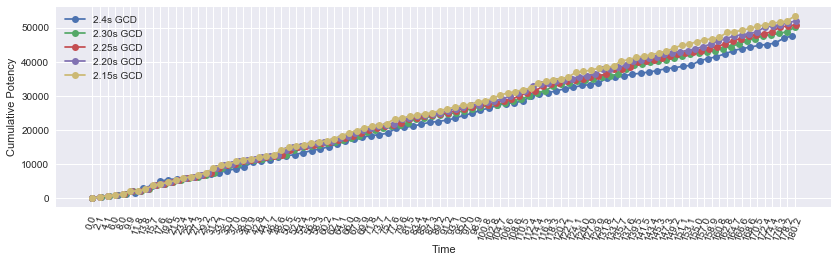

In [277]:
gcds = [2.40, 2.30, 2.25, 2.20, 2.15]
dfs = [df_2p4, df0, df1, df2, df3]
dfs_label = ['2.4s GCD', '2.30s GCD', '2.25s GCD', '2.20s GCD', '2.15s GCD']

compare_n_potencies(dfs, dfs_label)

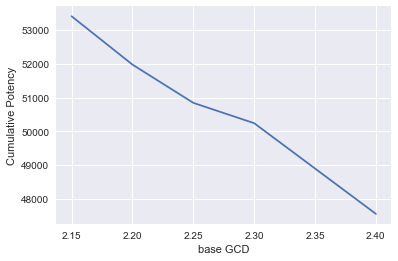

In [278]:
x = []
y = []
for k, df in enumerate(dfs):
    x.append(gcds[k])
    y.append(float(df.tail(1)['Total Potency']))

plt.plot(x, y)
plt.xlabel('base GCD')
plt.ylabel('Cumulative Potency')


2.40s GCD is between 932 and 1032 SkS according to: .

It takes about 50 points of SkS to decrease your GCD by 0.01 seconds. To reach a GCD of 2.15s, you require 2651 SkS... which not attainable yet.